In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Skills.csv')
print(df.shape)
df.head()

# df.columns

(5000, 16)


,C_Cpp,Java,Python,HTML_CSS,UI_UX,Javascript,Numpy_Pandas,Scikit_learn,MERN,Linux,Cloud_Platforms,App_development,Number_of_Contest_attempted,LC_Contest_rating,Leetcode_Medium_problems,Skills_rating
0,0,1,1,1,0,0,0,0,0,0,1,0,16,1304.0,178,5.52
1,1,1,1,0,0,0,0,0,0,1,0,0,35,1740.0,151,5.72
2,1,0,1,1,0,1,1,0,0,1,0,1,5,1414.0,184,7.71
3,1,1,1,1,0,1,0,0,0,1,0,0,0,1500.0,236,7.11
4,0,0,1,1,0,1,0,0,0,0,0,1,1,1513.0,241,5.14


In [28]:
df.corrwith(df['Skills_rating'])

C_Cpp                          0.179798
Java                           0.247914
Python                         0.273582
HTML_CSS                       0.139266
UI_UX                          0.166470
Javascript                     0.235417
Numpy_Pandas                   0.241316
Scikit_learn                   0.248663
MERN                           0.306666
Linux                          0.200484
Cloud_Platforms                0.305415
App_development                0.274670
Number_of_Contest_attempted    0.359179
LC_Contest_rating              0.422357
Leetcode_Medium_problems       0.230326
Skills_rating                  1.000000
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   C_Cpp                        5000 non-null   int64  
 1   Java                         5000 non-null   int64  
 2   Python                       5000 non-null   int64  
 3   HTML_CSS                     5000 non-null   int64  
 4   UI_UX                        5000 non-null   int64  
 5   Javascript                   5000 non-null   int64  
 6   Numpy_Pandas                 5000 non-null   int64  
 7   Scikit_learn                 5000 non-null   int64  
 8   MERN                         5000 non-null   int64  
 9   Linux                        5000 non-null   int64  
 10  Cloud_Platforms              5000 non-null   int64  
 11  App_development              5000 non-null   int64  
 12  Number_of_Contest_attempted  5000 non-null   int64  
 13  LC_Contest_rating 

In [9]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

<Figure size 3000x3000 with 0 Axes>

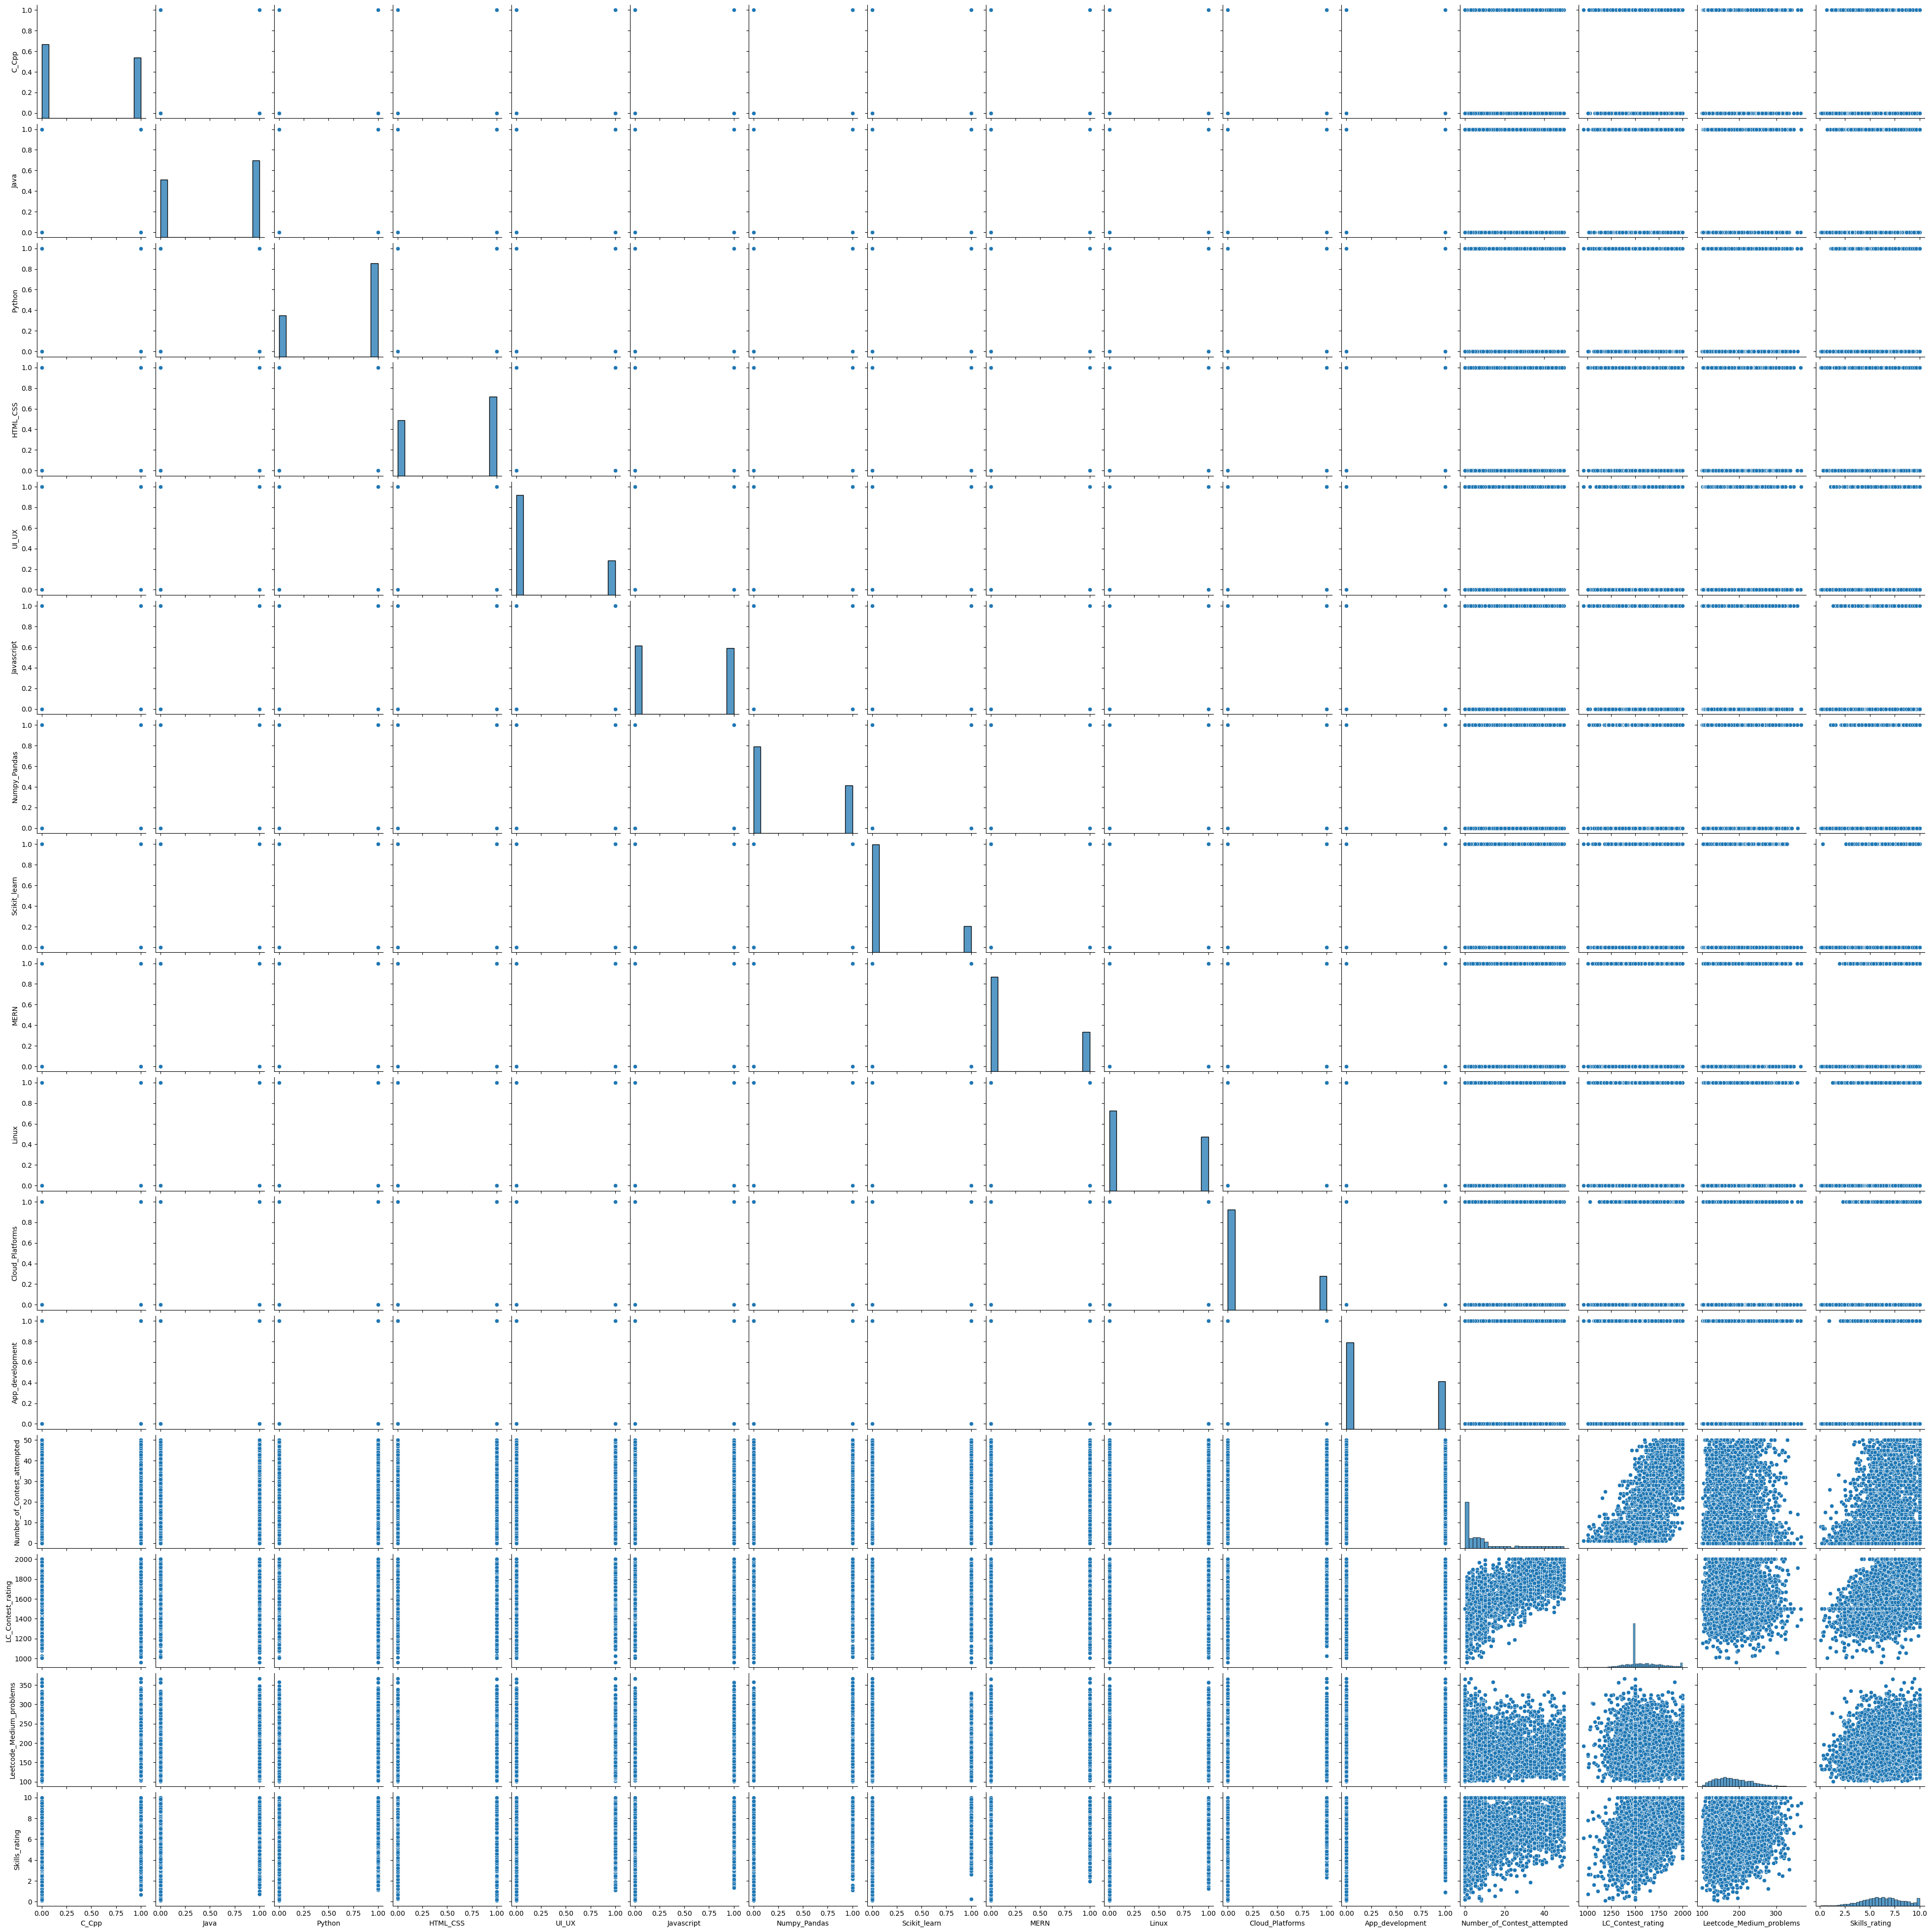

In [23]:
plt.figure(figsize=(30,30))

sns.pairplot(df)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [15]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9278450300862853

In [19]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, x_train, y_train, cv=10))

0.9268542845861314

In [21]:
lr.predict([[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 7, 1480, 169]])

/home/anni/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.57184812])